# Data Analyst Portfolio in Python

This repository contains my portfolio of Data Analyst projects, completed for self-learning and hobby purposes. It demonstrates my knoweldge and enthusiasm to learn about the different fundamentals of Data Analysis, collated in a single file. This repository consists of modules from Pandas, Numpy, Seaborn and Matplot library.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
df = pd.read_csv('data-cleaning-rmotr-freecodecamp-master/data-cleaning-rmotr-freecodecamp-master/data/btc-eth-prices-outliers.csv')
df.head()

,Timestamp,Bitcoin,Ether
0,2017-04-02,1099.169125,48.55
1,2017-04-03,1141.813000,44.13
2,2017-04-04,1141.600363,44.43
3,2017-04-05,1133.079314,44.90
4,2017-04-06,1196.307937,43.23


`index_col=0` allows the index to be the timestamps (this is our unique feature for the data).<br>
`parse_dates` allows us to parse a column into datetime.

In [3]:
df = pd.read_csv('data-cleaning-rmotr-freecodecamp-master/data-cleaning-rmotr-freecodecamp-master/data/btc-eth-prices-outliers.csv',
                index_col=0,
                 parse_dates=True)
df.head()

,Bitcoin,Ether
Timestamp,,
2017-04-02,1099.169125,48.55
2017-04-03,1141.813000,44.13
2017-04-04,1141.600363,44.43
2017-04-05,1133.079314,44.90
2017-04-06,1196.307937,43.23


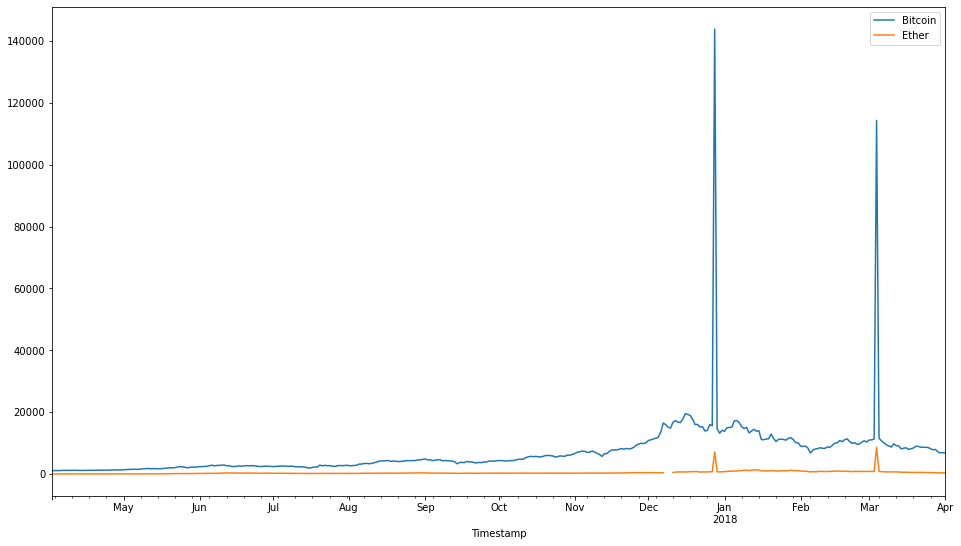

In [4]:
df.plot(figsize=(16,9))

A simple look at the graph shows two things. One is that there are huge spikes that don't fit the data pattern. Secondly, there are missing data between Dec 2017 and Jan 2018.

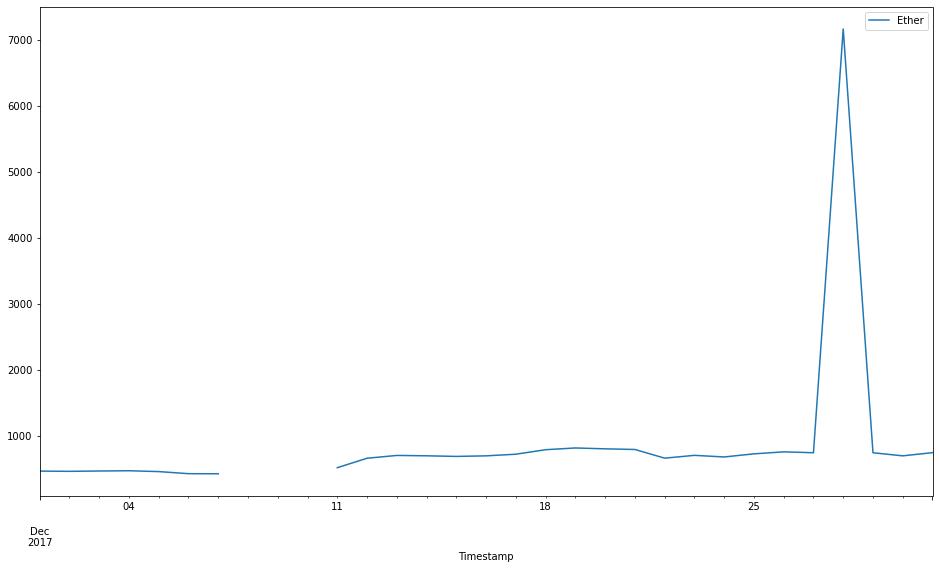

In [5]:
df.loc['2017-12-01':'2017-12-31'].plot(y= 'Ether', figsize=(16,9))

In [12]:
df_na = df.loc['2017-12': '2017-12-15']

We assign the period between the 1st of December and 15th of December as `df_na` and then we check to see if any of those values are null using `isna()`

In [13]:
df_na['Ether'].isna().values.any()

True

In [14]:
df_na.loc[df_na['Ether'].isna()]

,Bitcoin,Ether
Timestamp,,
2017-12-08,16007.436667,NaN
2017-12-09,15142.834152,NaN
2017-12-10,14869.805000,NaN


Now we have found the data that are null. We either decide if they should be filled or dropped.

In [16]:
df_na.loc['2017-12-04' : '2017-12-13'].fillna(method='bfill')

,Bitcoin,Ether
Timestamp,,
2017-12-04,11584.830000,466.93
2017-12-05,11878.433333,453.96
2017-12-06,13540.980000,422.48
2017-12-07,16501.971667,421.15
2017-12-08,16007.436667,513.29
2017-12-09,15142.834152,513.29
2017-12-10,14869.805000,513.29
2017-12-11,16762.116667,513.29
2017-12-12,17276.393333,656.52


In [17]:
df.fillna(method='bfill', inplace=True)

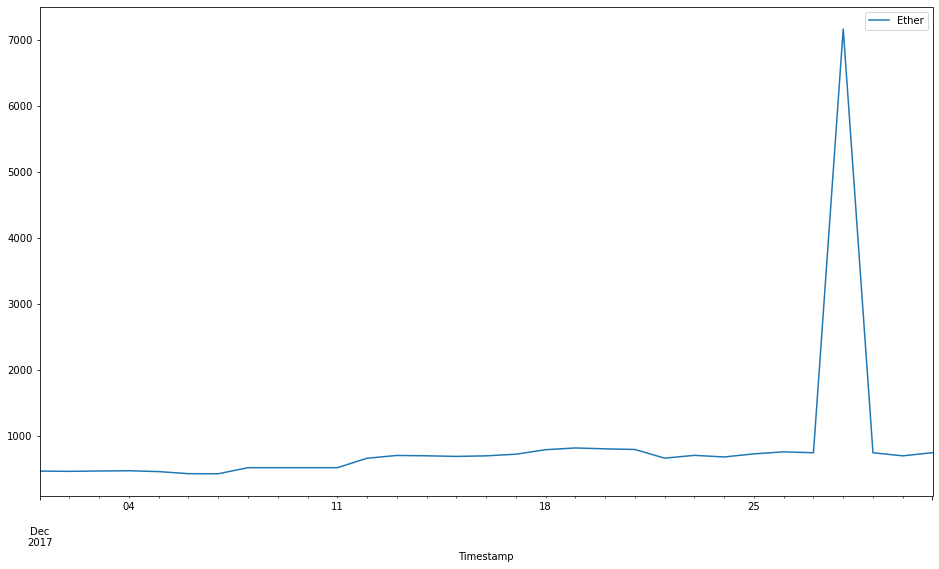

In [18]:
df.loc['2017-12-01':'2017-12-31'].plot(y= 'Ether', figsize=(16,9))

We can see that the data is now filled using the price from the forward date. Now it is time to fix the huge spikes.

In [26]:
df.loc['2017-12-26': '2017-12-31']

,Bitcoin,Ether
Timestamp,,
2017-12-26,15999.048333,753.40
2017-12-27,15589.321667,739.94
2017-12-28,143805.816667,7166.90
2017-12-29,14640.140000,739.60
2017-12-30,13215.574000,692.99
2017-12-31,14165.575000,741.13


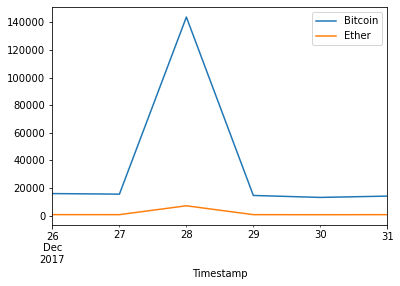

In [30]:
df.loc['2017-12-26': '2017-12-31'].plot()

In [21]:
df.loc['2018-03-01':'2018-03-07']

,Bitcoin,Ether
Timestamp,,
2018-03-01,11009.381667,869.87
2018-03-02,11055.815000,855.60
2018-03-03,11326.948333,855.65
2018-03-04,114301.816667,8648.30
2018-03-05,11595.540000,849.42
2018-03-06,10763.198333,815.69
2018-03-07,10118.058000,751.13


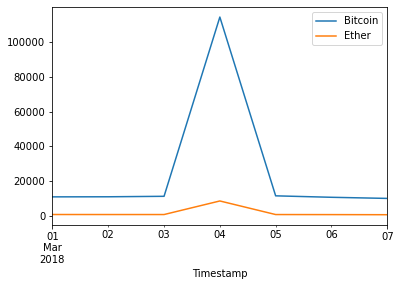

In [32]:
df.loc['2018-03-01':'2018-03-07'].plot()

Looking at both peaks, it looks invalid. We can drop these values using the `df.drop` function

In [34]:
df_clean = df.drop(pd.to_datetime(['2017-12-28', '2018-03-04']))

Both values have been dropped. The `.drop` drops the value from the dataframe. `pd.to_datetime` changes the string from text to date and the `[dates]` are stored there

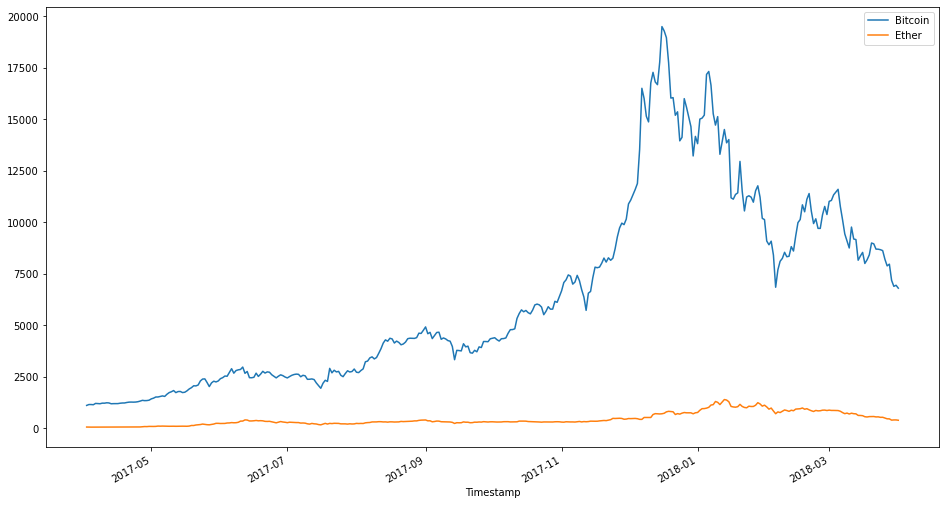

In [36]:
df_clean.plot(figsize = (16,9))

In [37]:
df_clean.loc['2017-12-26' : '2017-12-30']

,Bitcoin,Ether
Timestamp,,
2017-12-26,15999.048333,753.40
2017-12-27,15589.321667,739.94
2017-12-29,14640.140000,739.60
2017-12-30,13215.574000,692.99


In [41]:
df_clean.loc['2018-03-02' : '2018-03-06']

,Bitcoin,Ether
Timestamp,,
2018-03-02,11055.815000,855.60
2018-03-03,11326.948333,855.65
2018-03-05,11595.540000,849.42
2018-03-06,10763.198333,815.69


Our data seems to be cleaned now, we can head to analysis.

### Cleaning  Analysis
Visualizations helps make sense of the data and let us judge if our analysis and work is on the right track. But we need a more powerful method to handle our data. That's what we call "analysis". We'll use _analytical_ methods to identify these outliers or these skewed values.

#### Averages

In [42]:
df.mean()

Bitcoin    6996.004022
Ether       469.609068
dtype: float64

In [43]:
df.std()

Bitcoin    10186.586168
Ether        634.202918
dtype: float64

In [44]:
df.median()

Bitcoin    4594.98785
Ether       309.49000
dtype: float64

#### Visualisation of averages

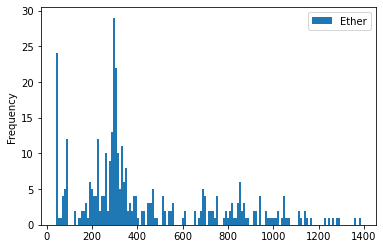

In [49]:
df_clean.plot(kind='hist',y='Ether', bins=150 )

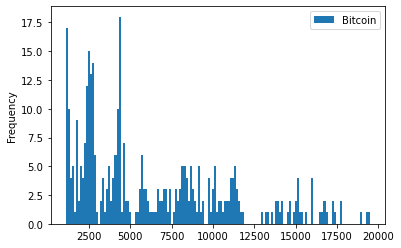

In [50]:
df_clean.plot(kind='hist',y='Bitcoin', bins=150 )

Using `seaborn` and the `distplot`

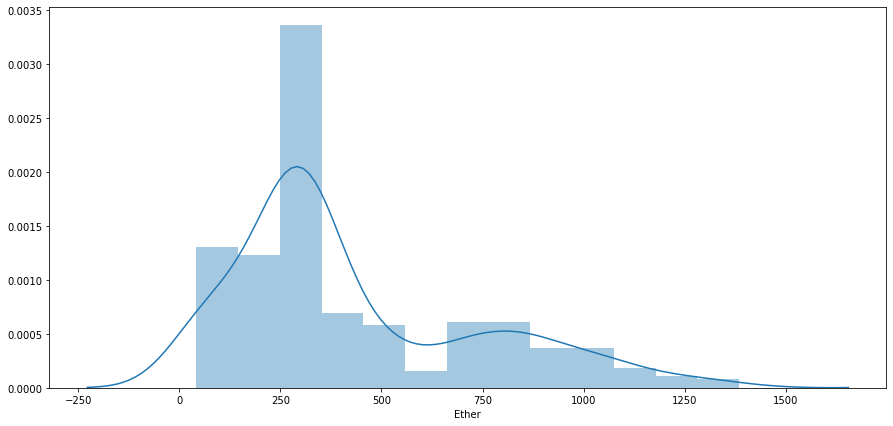

In [56]:
fig, ax = plt.subplots(figsize=(15, 7))
sns.distplot(df_clean['Ether'], ax=ax)

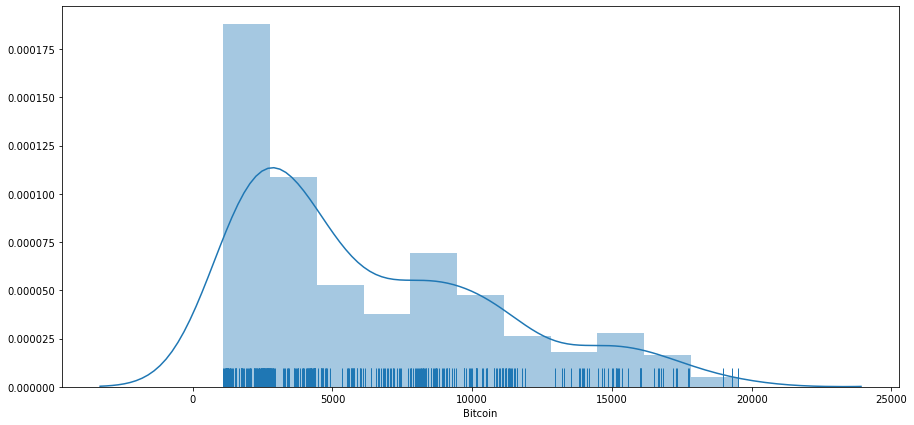

In [63]:
fig, ax = plt.subplots(figsize=(15, 7))
sns.distplot(df_clean['Bitcoin'], rug=True, ax=ax)

A cumulative plot of the distribution

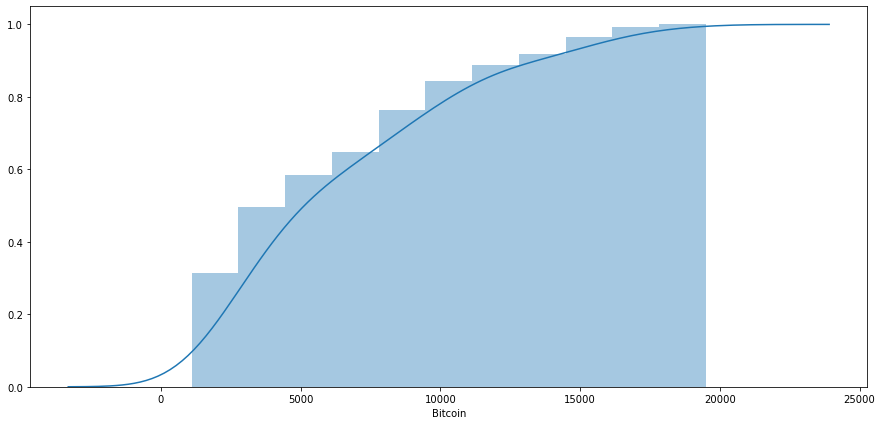

In [65]:
fig, ax = plt.subplots(figsize=(15, 7))
sns.distplot(df_clean['Bitcoin'], ax=ax,
             hist_kws=dict(cumulative=True),
             kde_kws=dict(cumulative=True))

Looking at the plot, we see a lot of the distribution behind a certain value. We alter the bins to get greater detail.

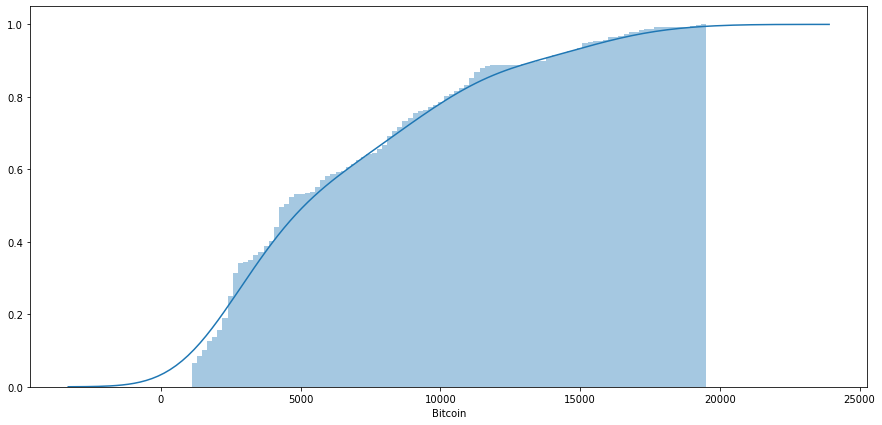

In [66]:
fig, ax = plt.subplots(figsize=(15, 7))
sns.distplot(df_clean['Bitcoin'], ax=ax, bins=100,
             hist_kws=dict(cumulative=True),
             kde_kws=dict(cumulative=True))

#### Visualising Bivariate Distribution
The most common way to observe a bivariate distribution is a scatterplot, the `jointplot` will also include the distribution of the variables:

C:\Users\Sajid\anaconda3\lib\site-packages\seaborn\axisgrid.py:2264: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


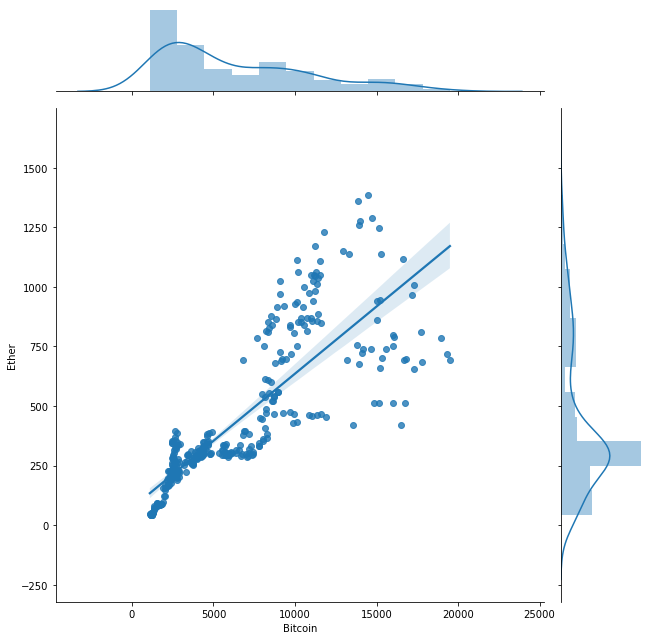

In [79]:
sns.jointplot(x="Bitcoin", y="Ether", data=df_clean, size=9, kind="reg")

Looking at this `jointplot`, the highest peaks on the histogram relates to the Mean of Distribution. The top and right distribution is called the Marginal Distribution. We can see the relationship between Bitcoin and Ether are positive.

C:\Users\Sajid\anaconda3\lib\site-packages\seaborn\axisgrid.py:2264: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


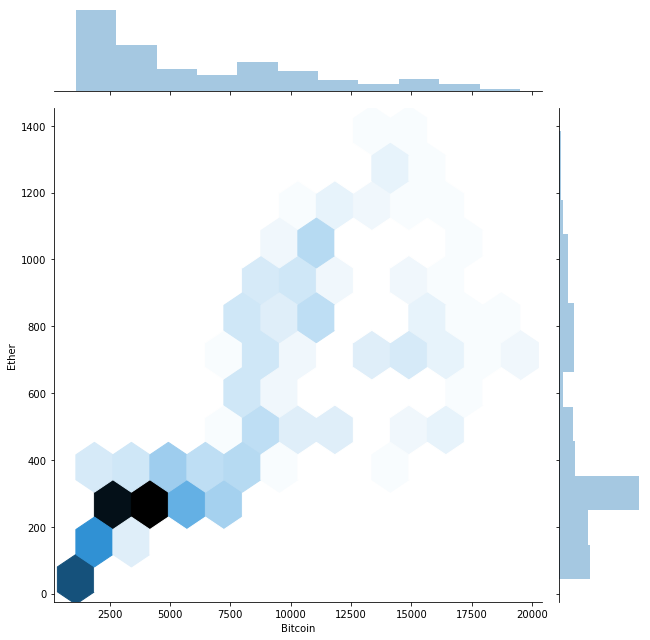

In [76]:
sns.jointplot(x="Bitcoin", y="Ether", data=df_clean, size=9, kind="hex")

With the `kind=hex` we form a hexagonal heat map. When there is a high denisty between Bitcoin and Ether, there will be a darker colour and when there is a low density, there will be a lighter colour.

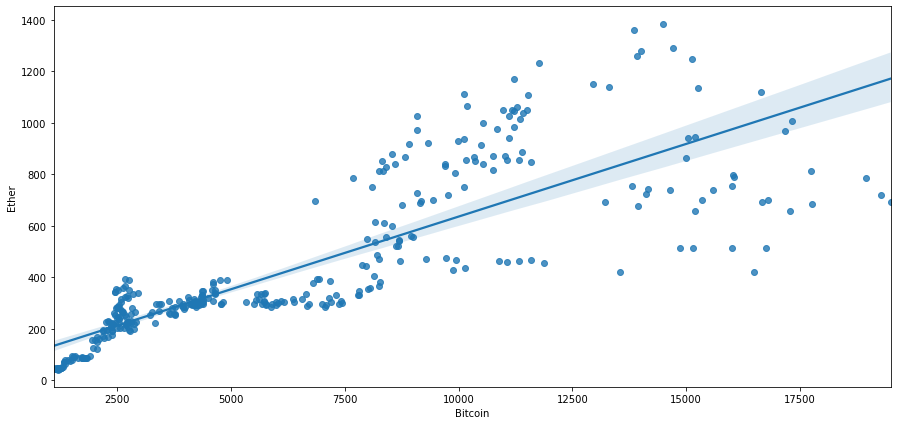

In [72]:
fig, ax = plt.subplots(figsize=(15, 7))
sns.regplot(x="Bitcoin", y="Ether", data=df_clean, ax=ax)

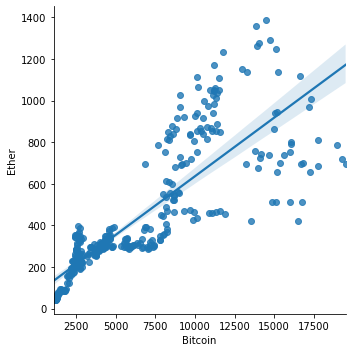

In [75]:
sns.lmplot(x="Bitcoin", y="Ether", data=df_clean)

Automatically, we can say as the price of Bitcoin increases, Ether increases with it. There are quite a few outliers in the data certainly around the high Ether prices which could mean that Ether is a seperate entity to Bitcoin especailly after $7500 of Bitcoin.

#### Quantiles, Quarters and Percentiles

In [81]:
df_clean['Bitcoin'].quantile(.2)

2438.8627342857144

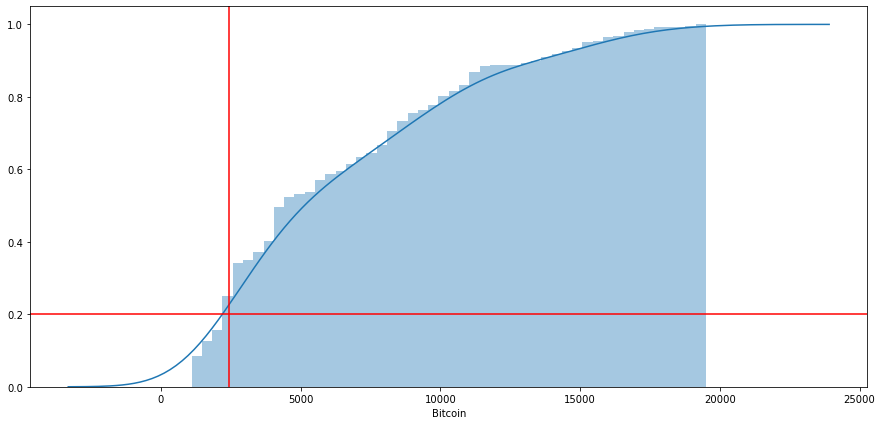

In [83]:
fig, ax = plt.subplots(figsize=(15, 7))
sns.distplot(df_clean['Bitcoin'], ax=ax, bins=50,
             hist_kws=dict(cumulative=True),
             kde_kws=dict(cumulative=True))
ax.axhline(0.2, color='red')
ax.axvline(df_clean['Bitcoin'].quantile(.2), color='red')

In [84]:
df_clean['Bitcoin'].quantile(.5)

4580.3874799999985

In [85]:
df_clean['Bitcoin'].median()

4580.3874799999985

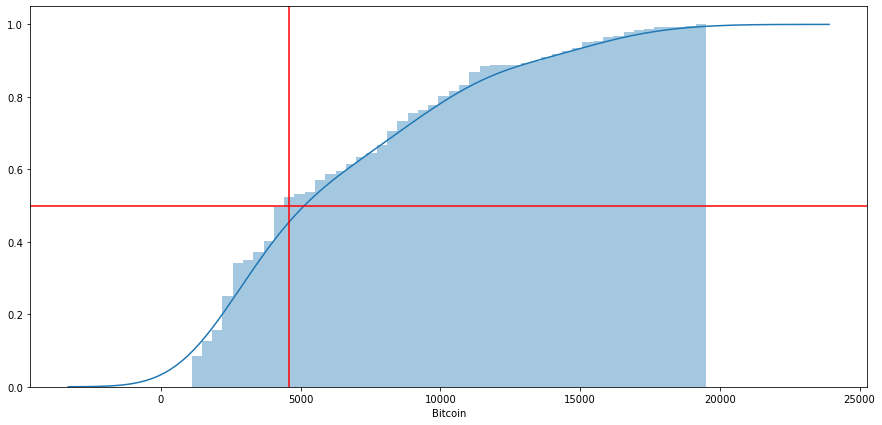

In [86]:
fig, ax = plt.subplots(figsize=(15, 7))
sns.distplot(df_clean['Bitcoin'], ax=ax, bins=50,
             hist_kws=dict(cumulative=True),
             kde_kws=dict(cumulative=True))
ax.axhline(0.5, color='red')
ax.axvline(df_clean['Bitcoin'].quantile(.5), color='red')

#### Range

In [88]:
df_clean['Bitcoin'].max() - df_clean['Bitcoin'].min()

18399.514208333334

#### Variance,Standard Deviation and IQR

In [89]:
df['Bitcoin'].var()

103766537.75278114

In [90]:
df['Bitcoin'].std(),df_clean['Bitcoin'].std()

(10186.586167739471, 4513.757662530282)

In [92]:
df_clean['Bitcoin'].quantile(.75) - df_clean['Bitcoin'].quantile(.25)

6548.249242559523

#### Analytical Analysis of invalid values

We can now use the measurements we've seen to analyze those values that seem invalid.
##### Using `std`: Z scores

We can now define those values that are a couple of Z scores above or below the mean (or the max/min value). Example:

In [93]:
upper_limit = df['Bitcoin'].mean() + 2 * df['Bitcoin'].std()
lower_limit = df['Bitcoin'].mean() - 2 * df['Bitcoin'].std()
print("Upper Limit: {}".format(upper_limit))
print("Lower Limit: {}".format(lower_limit))

Upper Limit: 27369.17635730168
Lower Limit: -13377.168313656206


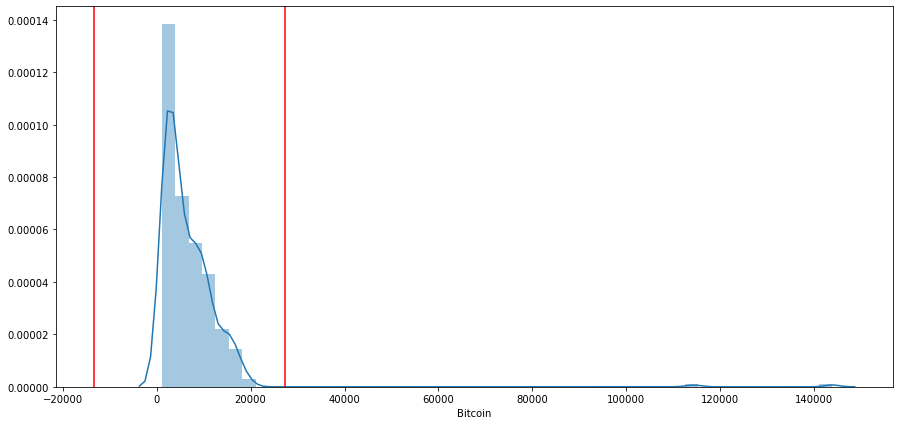

In [94]:
fig, ax = plt.subplots(figsize=(15, 7))
sns.distplot(df['Bitcoin'], ax=ax)
ax.axvline(lower_limit, color='red')
ax.axvline(upper_limit, color='red')

Seems like this is a good measurement. Our lower limit doesn't make a lot of sense, as negative values are invalid. But our upper limit has a really good measure. Anything above \$27,369 is considered to be an invalid value. Pretty accurate.

#### Using IQR

In [96]:
iqr = df['Bitcoin'].quantile(.75) - df['Bitcoin'].quantile(.25)
iqr

6597.494147619047

In [99]:
upper_limit = df['Bitcoin'].mean() + 2 * iqr
lower_limit = df['Bitcoin'].mean() - 2 * iqr
print("Upper Limit: {}".format(upper_limit))
print("Lower Limit: {}".format(lower_limit))

Upper Limit: 20190.99231706083
Lower Limit: -6198.984273415356


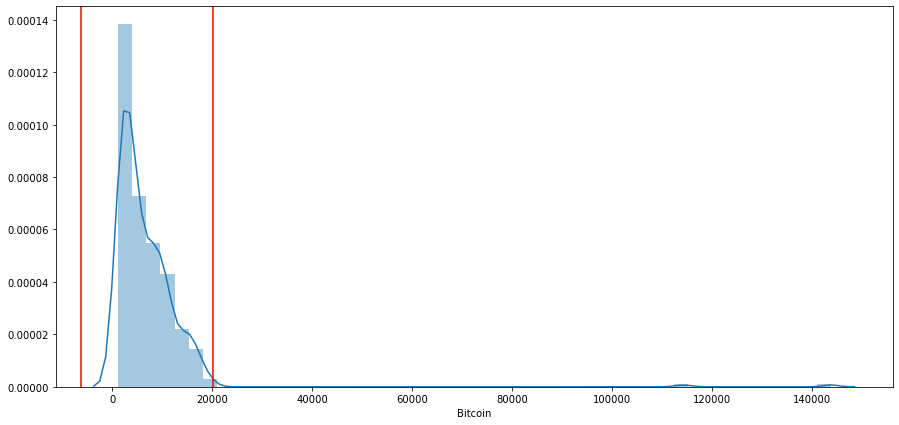

In [100]:
fig, ax = plt.subplots(figsize=(15, 7))
sns.distplot(df['Bitcoin'], ax=ax)
ax.axvline(lower_limit, color='red')
ax.axvline(upper_limit, color='red')

Our measurement now is a little bit less precise. There are a few valid values (20k) that seem to be above our upper limit. Regardless, it's still a good indicator.

### Cleaning invalid values analytically

It's time now to remove these invalid values analytically, we'll use the upper limit defined by standard deviation:

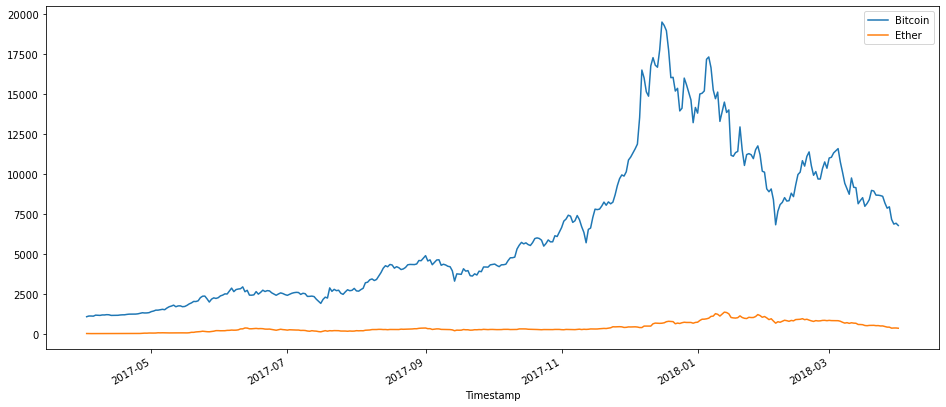

In [102]:
upper_limit = df['Bitcoin'].mean() + 2 * df['Bitcoin'].std()
df[df['Bitcoin'] < upper_limit].plot(figsize=(16, 7))

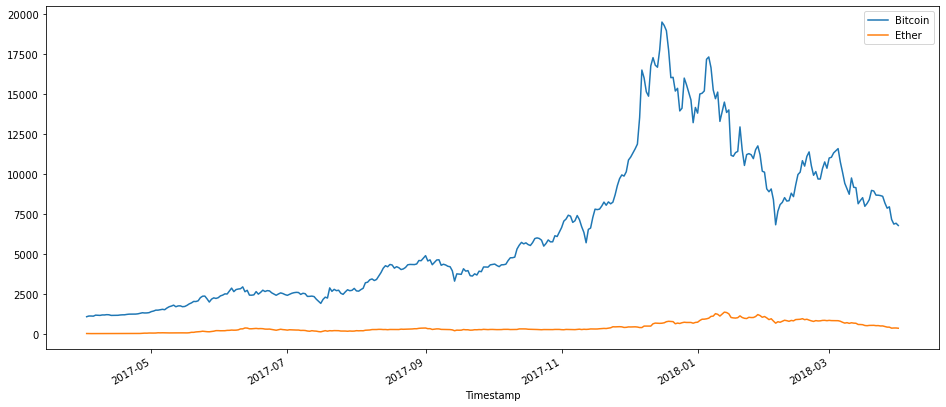

In [103]:
df.drop(df[df['Bitcoin'] > upper_limit].index).plot(figsize=(16, 7))